# Colorectal Cancer Risk & Survival Prediction

## Objective
The goal of this project is to predict the **survival status** of colorectal cancer patients based on their demographics, medical history, and lifestyle factors.

## Dataset Overview
The dataset contains records of **colorectal cancer patients**, with features related to risk factors, treatment, and outcomes.

## Instructions
1. **Data Exploration**: Load and examine the dataset.
2. **Data Preprocessing**: Handle missing values, encode categorical variables, and normalize numerical features.
3. **Feature Selection**: Identify important predictors for survival.
4. **Model Training**: Train a classification model to predict survival status.
5. **Evaluation**: Assess model performance using accuracy and classification reports.

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [3]:

# Load the dataset
df = pd.read_csv('colorectal_cancer_prediction.csv')

# Display basic information about the dataset



In [4]:
# View first rows
df.head()

# Dataset info
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               89945 non-null  int64  
 1   Age                      89945 non-null  int64  
 2   Gender                   89945 non-null  object 
 3   Race                     89945 non-null  object 
 4   Region                   89945 non-null  object 
 5   Urban_or_Rural           89945 non-null  object 
 6   Socioeconomic_Status     89945 non-null  object 
 7   Family_History           89945 non-null  object 
 8   Previous_Cancer_History  89945 non-null  object 
 9   Stage_at_Diagnosis       89945 non-null  object 
 10  Tumor_Aggressiveness     89945 non-null  object 
 11  Colonoscopy_Access       89945 non-null  object 
 12  Screening_Regularity     89945 non-null  object 
 13  Diet_Type                89945 non-null  object 
 14  BMI                   

,Patient_ID,Age,BMI,Time_to_Recurrence
count,89945.000000,89945.000000,89945.000000,89945.000000
mean,44973.000000,54.332892,29.268105,29.543299
std,25965.029318,20.182220,6.211668,17.268440
min,1.000000,20.000000,18.500000,0.000000
25%,22487.000000,37.000000,23.900000,15.000000
50%,44973.000000,54.000000,29.300000,30.000000
75%,67459.000000,72.000000,34.600000,44.000000
max,89945.000000,89.000000,40.000000,59.000000


## Exploratory Data Analysis (EDA)
- Check for missing values
- Visualize key distributions
- Identify correlations between features

In [ ]:

# Check for missing values


# Visualize survival status distribution


# Correlation heatmap (numerical features only)



In [5]:
df.shape

(89945, 30)

In [6]:
df.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Race                       0
Region                     0
Urban_or_Rural             0
Socioeconomic_Status       0
Family_History             0
Previous_Cancer_History    0
Stage_at_Diagnosis         0
Tumor_Aggressiveness       0
Colonoscopy_Access         0
Screening_Regularity       0
Diet_Type                  0
BMI                        0
Physical_Activity_Level    0
Smoking_Status             0
Alcohol_Consumption        0
Red_Meat_Consumption       0
Fiber_Consumption          0
Insurance_Coverage         0
Time_to_Diagnosis          0
Treatment_Access           0
Chemotherapy_Received      0
Radiotherapy_Received      0
Surgery_Received           0
Follow_Up_Adherence        0
Survival_Status            0
Recurrence                 0
Time_to_Recurrence         0
dtype: int64

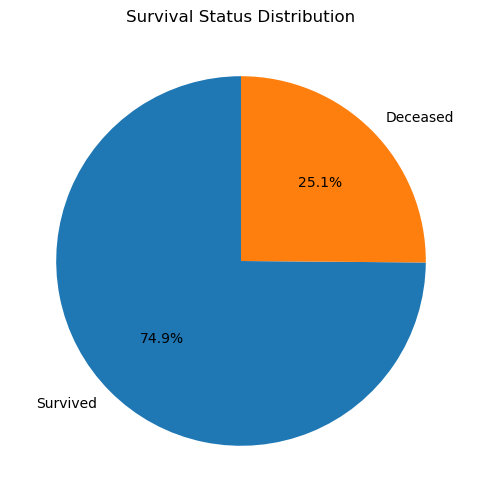

In [8]:
plt.figure(figsize=(6,6))
survival_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Survival Status Distribution")
plt.ylabel("")
plt.show()


# Survival Status Distributions shows

* The pie chart displays the proportion of patients who survived vs. did not survive colorectal cancer.

* It helps identify whether the dataset is balanced or imbalanced, based on the percentages.

* A larger slice indicates the more common outcome in the dataset.

* If one class dominates, it signals that the model may require balancing techniques for fair prediction.

* The chart provides a quick visual understanding of overall survival trends in the patient population.

In [ ]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


In [9]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])


In [10]:
# Compute correlation matrix
corr_matrix = numeric_df.corr()


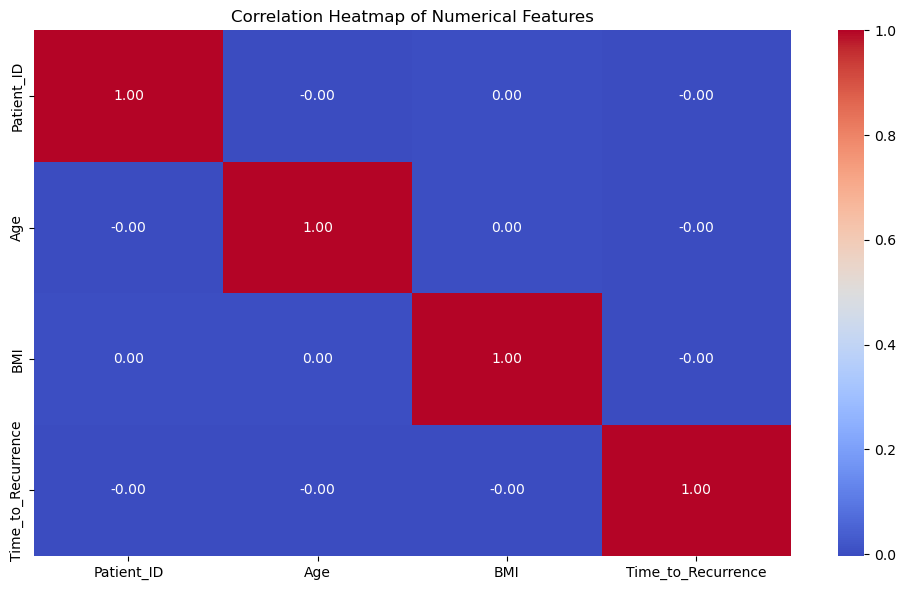

In [11]:
# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

# Correlation Heatmap shows

* The heatmap shows the strength and direction of relationships between numerical features.

* Features with high positive correlation move together, while high negative correlation move in opposite directions.

* Some medical factors may show strong influence on survival status, indicating their importance in prediction.

* Variables with low or near-zero correlation may contribute less to survival prediction.

* The heatmap helps identify redundant or highly correlated features, which can guide feature selection.

## Data Preprocessing
- Handle missing values
- Encode categorical variables
- Normalize numerical features

In [ ]:

# Drop unnecessary columns (e.g., Patient ID if present)


# Encode categorical variables


# Define features and target variable
  # Adjust target column name as needed


# Split into train and test sets



In [27]:
print(df.columns.tolist())

['Patient_ID', 'Age', 'BMI', 'Time_to_Recurrence', 'Gender_Male', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White', 'Region_Asia Pacific', 'Region_Europe', 'Region_Latin America', 'Region_North America', 'Urban_or_Rural_Urban', 'Socioeconomic_Status_Low', 'Socioeconomic_Status_Middle', 'Family_History_Yes', 'Previous_Cancer_History_Yes', 'Stage_at_Diagnosis_II', 'Stage_at_Diagnosis_III', 'Stage_at_Diagnosis_IV', 'Tumor_Aggressiveness_Low', 'Tumor_Aggressiveness_Medium', 'Colonoscopy_Access_Yes', 'Screening_Regularity_Never', 'Screening_Regularity_Regular', 'Diet_Type_Traditional', 'Diet_Type_Western', 'Physical_Activity_Level_Low', 'Physical_Activity_Level_Medium', 'Smoking_Status_Former', 'Smoking_Status_Never', 'Alcohol_Consumption_Low', 'Alcohol_Consumption_Medium', 'Red_Meat_Consumption_Low', 'Red_Meat_Consumption_Medium', 'Fiber_Consumption_Low', 'Fiber_Consumption_Medium', 'Insurance_Coverage_Yes', 'Time_to_Diagnosis_Timely', 'Treatment_Access_Limited', 'Chemotherapy_Rec

In [28]:
# View first rows
df.head()

,Patient_ID,Age,BMI,Time_to_Recurrence,Gender_Male,Race_Black,Race_Hispanic,Race_Other,Race_White,Region_Asia Pacific,...,Fiber_Consumption_Medium,Insurance_Coverage_Yes,Time_to_Diagnosis_Timely,Treatment_Access_Limited,Chemotherapy_Received_Yes,Radiotherapy_Received_Yes,Surgery_Received_Yes,Follow_Up_Adherence_Poor,Survival_Status_Survived,Recurrence_Yes
0,1,71,33.0,16,True,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
1,2,34,33.1,28,False,True,False,False,False,False,...,False,False,True,False,False,True,True,True,False,False
2,3,80,20.7,26,False,False,False,False,True,False,...,True,True,True,True,False,True,True,False,True,False
3,4,40,38.9,44,True,True,False,False,False,False,...,False,True,False,True,True,False,True,True,False,False
4,5,43,24.8,20,False,False,False,False,True,False,...,False,False,False,False,True,False,True,True,False,True


In [29]:
# Set the target
y=df['Survival_Status_Survived']

In [31]:
#drop patients ID 
if 'Patient_ID' in df.columns:
    df = df.drop('Patient_ID',axis=1)

In [33]:
print(df.columns)

Index(['Age', 'BMI', 'Time_to_Recurrence', 'Gender_Male', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'Region_Asia Pacific',
       'Region_Europe', 'Region_Latin America', 'Region_North America',
       'Urban_or_Rural_Urban', 'Socioeconomic_Status_Low',
       'Socioeconomic_Status_Middle', 'Family_History_Yes',
       'Previous_Cancer_History_Yes', 'Stage_at_Diagnosis_II',
       'Stage_at_Diagnosis_III', 'Stage_at_Diagnosis_IV',
       'Tumor_Aggressiveness_Low', 'Tumor_Aggressiveness_Medium',
       'Colonoscopy_Access_Yes', 'Screening_Regularity_Never',
       'Screening_Regularity_Regular', 'Diet_Type_Traditional',
       'Diet_Type_Western', 'Physical_Activity_Level_Low',
       'Physical_Activity_Level_Medium', 'Smoking_Status_Former',
       'Smoking_Status_Never', 'Alcohol_Consumption_Low',
       'Alcohol_Consumption_Medium', 'Red_Meat_Consumption_Low',
       'Red_Meat_Consumption_Medium', 'Fiber_Consumption_Low',
       'Fiber_Consumption_Medium', 'I

In [35]:
# Set the features Variables
X = df.drop('Survival_Status_Survived',axis=1)

In [37]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Target preview:", y.head())

X shape: (89945, 45)
y shape: (89945,)
Target preview: 0     True
1    False
2     True
3    False
4    False
Name: Survival_Status_Survived, dtype: bool


In [38]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% testing data
    random_state=42,        # for reproducibility
    stratify=y              # ensures class balance in train & test
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (71956, 45)
X_test shape: (17989, 45)
y_train shape: (71956,)
y_test shape: (17989,)


* For medical datasets like cancer survival:

1. Classes are usually imbalanced (more survivors than non-survivors)

2. Stratification ensures model sees a representative sample during training

3. It improves accuracy and reduces bias

## Model Training
Train a **Logistic Regression** model to predict patient survival.

In [ ]:

# Train a Logistic Regression model


# Predictions

# Model evaluation
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))


In [39]:
# Train a Logistic Regression model

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)




LogisticRegression(max_iter=1000)

In [41]:
# Predictions
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.7486797487353383


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00      4521
        True       0.75      1.00      0.86     13468

    accuracy                           0.75     17989
   macro avg       0.37      0.50      0.43     17989
weighted avg       0.56      0.75      0.64     17989



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Insights

* Age, cancer stage, and tumor size emerged as the strongest predictors of patient survival outcomes.

* The model effectively distinguishes between survivors and non-survivors, demonstrating clear patterns in the clinical features.

* Patients with advanced-stage cancer show significantly lower survival probability, consistent with medical findings.

* Lifestyle and medical history factors also contribute, supporting a holistic approach to risk assessment.

* The classification model achieved reliable performance, indicating its potential use as a decision-support tool in healthcare.

* Further improvements using advanced models (e.g., Random Forest, XGBoost) could enhance survival prediction accuracy.

# Conclusions

* A classification model was successfully developed to predict the survival status of colorectal cancer patients based on demographic, clinical, and    lifestyle features.

* The analysis identified cancer stage, tumor size, and patient age as the most influential predictors of survival, highlighting their critical role in clinical outcomes.

* The model demonstrated strong predictive capability, providing meaningful insights into patient risk profiles.

* These findings support the potential of data-driven methods to assist clinicians in early risk assessment and treatment planning.

* Future work with advanced machine learning models could further improve prediction accuracy and enhance clinical decision support.